ファイル構造
データ置き場
在庫MB
所在管理M

表記揺れを課題として書く！
ファイル閉じないと書き込みできない

In [ ]:
Jupyter labのインストール
バージョン管理

In [1]:
#メモリのリセット
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [7]:
#注意）ファイル名表示されない
%ls

かり.ipynb                 冬休み宿題.txt
前処理&モデル.ipynb        データ置き場/
作成中.ipynb               データ作成.ipynb
中間成果物/                データ可視化.ipynb


<div style="background-color:#CFF; padding: 20px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:20px;">環境構築</span>
</div>

* 本コードで使用するライブラリをimport
* INPUT：無し
* OUTPUT:環境

In [2]:
#ライブラリのimport
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import time
import shutil
from dateutil.relativedelta import relativedelta
from IPython.display import display, clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime

<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ1：パスの定義</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：本コードで使用する各種データセットのパスを定義。
* **入力（実行するために必要な情報）**：無し。
* **出力（実行後に生成される成果物）**：無し（コード上でパス変数の定義）。

## ＜コードの構成（下のコードセルをクリックで選択後、「shift」+「enter」キーを押すと実行できます）＞


In [3]:
#元データのパス
folder_path_zaikoMB = 'データ置き場/在庫MB'
folder_path_LTMB = 'データ置き場/所在管理MB'
folder_path_tehaisu = 'データ置き場/手配必要数'
folder_path_tehaiunyo = 'データ置き場/手配運用情報'
folder_path_pitch = 'データ置き場/不等ピッチ係数'
folder_path_kotei = 'データ置き場/使用工程'
folder_path_kumitate = 'データ置き場/組立実績MB'
#中間成果物のパス
folder_path_interproduct = '中間成果物'
file_path_zaikodata = '中間成果物/在庫MBデータ_統合済.csv'
file_path_LTdata = '中間成果物/所在管理MBデータ_統合済.csv'
file_path_kumitate = '中間成果物/組立実績MBデータ_統合済.csv'
file_path_pitch = '中間成果物/不等ピッチデータ.csv'
file_path_kotei = '中間成果物/使用工程データ.csv'
file_path_zaikodata_extract = '中間成果物/在庫MBデータ_統合済&特定日時抽出済.csv'
file_path_LTdata_extract = '中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv'
file_path_kumitate_extract = '中間成果物/組立実績MBデータ_統合済&特定日時抽出済.csv'
file_path_tehaisu_with_tehaiunyo = '中間成果物/手配数データ_手配運用情報統合済'
file_path_LTdata_extract_with_tehaisu = '中間成果物/所在管理MBデータ_統合済&特定日時抽出済&手配数と手配運用情報統合済.csv'
file_path_weekly_data = '中間成果物/週単位のデータ.csv'
file_path_weekly_data_with_kumitate = '中間成果物/週単位のデータ_組立統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch = '中間成果物/週単位のデータ_組立&組立実績統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei = '中間成果物/週単位のデータ_組立&組立実績＆使用工程統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others = '中間成果物/週単位のデータ_組立&組立実績＆使用工程統合済＆必要変数追記.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned = '中間成果物/週単位のデータ_組立&組立実績＆使用工程統合済＆必要変数追記_クリーニング済.csv'
#最終成果物のパス
folder_path_finalproduct = '最終成果物'

#実行完了

<div style="background-color:#CFF; padding: 10px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ2：データの集約（在庫推移MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：在庫推移MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：在庫推移MotionBoardから出力した１つ以上のCSVファイル（置き場：）。
* **出力（実行後に生成される成果物）**：在庫推移MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（置き場：）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 在庫推移MotionBoardにアクセス：[在庫推移MotionBoardリンク](http://10.88.11.58:18081/MBSF/main?id=b9154fd0-6fe6-d153-7d17-053da4c333ea&mbid=fidtnjir4nq3ja63cqcaaafmoqcx4&boardpath=%2FMSR%2F%E8%87%AA%E5%8B%95%E3%83%A9%E3%83%83%E3%82%AF%2FT403%E7%89%A9%E6%B5%81%E6%83%85%E5%A0%B1_%E5%9C%A8%E5%BA%AB%E6%8E%A8%E7%A7%BB)
2. 必要なデータをディレクトリに格納します。

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞


In [141]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_zaikoMB = [f for f in os.listdir(folder_path_zaikoMB) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_zaikoMB) != 0:

    # 統合結果を保存するための空のDataFrameを作成
    merged_df_zaiko = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_zaikoMB:
        file_path = os.path.join(folder_path_zaikoMB, file)
        df_zaiko = pd.read_csv(file_path, encoding='Shift_JIS')
        merged_df_zaiko = pd.concat([merged_df_zaiko, df_zaiko], ignore_index=True)
        
    #重複があれば削除
    merged_df_zaiko_unique =  merged_df_zaiko.drop_duplicates(subset=['計測日時', '品番'])
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_zaikoMB)}つのCSVファイルが見つかりました！\n以下に統合したデータの外観を示します(重複したデータは削除済みです)")

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_zaikodata, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_zaiko_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_zaiko_unique)
    
# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
3つのCSVファイルが見つかりました！
以下に統合したデータの外観を示します(重複したデータは削除済みです)


,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）
0,2023/12/10 00:00:00,019120LC030,30113,11.0,0.0,0.0
1,2023/12/10 00:00:00,019120LC050,20115,5.0,0.0,0.0
2,2023/12/10 00:00:00,019120LC060,30116,10.0,0.0,0.0
3,2023/12/10 00:00:00,019120LC070,20117,11.0,0.0,0.0
4,2023/12/10 00:00:00,019128GA010,50460,26.0,0.0,0.0
...,...,...,...,...,...,...
253787,2023/9/29 23:00,G9201ECE010,50446,75.0,0.0,4.0
253788,2023/9/29 23:00,G9351ECB010,20409,21.0,0.0,5.0
253789,2023/9/29 23:00,G9351ECE010,20406,26.0,0.0,3.0
253790,2023/9/29 23:00,Y021720076*****,30121,1.0,1.0,0.0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ3：データの集約（所在管理MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：所在管理MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：所在管理MotionBoardから出力した１つ以上のCSVファイル。
* **出力（実行後に生成される成果物）**：所在管理MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 所在管理MotionBoardにアクセス：[所在管理MotionBoardリンク](http://10.88.11.58:18081/MBSF/main?id=8045ec22-9e62-92c7-5e1e-077d35e5dc33&mbid=fidepnyfuff3ra63kitaaae3ywjmi&boardpath=%2FMSR%2F%E8%87%AA%E5%8B%95%E3%83%A9%E3%83%83%E3%82%AF%2FT403%E7%89%A9%E6%B5%81%E6%83%85%E5%A0%B1_v2)
2. 必要なデータをディレクトリに格納します。➀「サブフィルターを表示」押下
➁1Yを設定
➂SHIftjisでダウンロード

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [46]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_LTMB = [f for f in os.listdir(folder_path_LTMB) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_LTMB) != 0:
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_LT = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_LTMB:
        file_path = os.path.join(folder_path_LTMB, file)
        df_LT = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_LT = pd.concat([merged_df_LT, df_LT], ignore_index=True)
        
    #重複があれば削除
    merged_df_LT_unique =  merged_df_LT.drop_duplicates(subset=['かんばんシリアル', '伝票番号','品番'])

    # 不要な特定の列を削除
    merged_df_LT_unique = merged_df_LT_unique.drop("伝票番号", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("拠点所番地", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("組立投入日時", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("発注取消日時", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("発注〜組立LT", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("長期滞留フラグ", axis=1)

    # 特定の文字列を含む行を削除する
    target_string = "< NULL >"
    merged_df_LT_unique = merged_df_LT_unique[~merged_df_LT_unique.apply(lambda x: x.str.contains(target_string)).any(axis=1)]
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_LTMB)}つのCSVファイルが見つかりました！\n以下に統合したデータの外観を示します(重複したデータは削除済みです)")

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_LTdata, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_LT_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_LT_unique)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのCSVファイルが見つかりました！
以下に統合したデータの外観を示します(重複したデータは削除済みです)


,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,発注日時,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
5,1Z23J00063158,35441TFA010,ｽﾄﾚｰﾅｰｵｲﾙ,100,（株）ニフコ,名古屋事業所,回収済,2023/9/27,1,2023/9/25 10:01,...,2023/9/27 15:31,2023/9/29 15:58,2023/9/30 4:35,2023/9/30 7:13,0.09,2.23,4.25,4.77,4.88,2023/9/30 7:13
7,1Z23J00062502,35441ECB010,ｽﾄﾚｰﾅｰｵｲﾙ,48,（株）ニフコ,名古屋事業所,回収済,2023/9/27,1,2023/9/25 10:01,...,2023/9/27 15:31,2023/9/28 1:06,2023/9/30 5:28,2023/9/30 7:13,0.09,2.23,2.63,4.81,4.88,2023/9/30 7:13
10,1Z23J00055323,35141ECB010,ｹ-ｽT/A,16,（株）アイシン福井,本社工場,回収済,2023/9/28,2,2023/9/21 0:33,...,2023/9/28 14:10,2023/9/29 13:55,2023/9/30 5:40,2023/9/30 7:13,6.74,7.57,8.56,9.21,9.28,2023/9/30 7:13
11,1Z23J00055256,41310ECE010,ｷﾞﾔﾃﾞﾌﾘﾝｸﾞ,2,（株）オンド,本社工場,回収済,2023/9/28,2,2023/9/21 0:33,...,2023/9/28 12:13,2023/9/29 11:09,2023/9/30 5:35,2023/9/30 7:13,1.19,7.49,8.44,9.21,9.28,2023/9/30 7:13
12,1Z23J00055252,41310ECE010,ｷﾞﾔﾃﾞﾌﾘﾝｸﾞ,2,（株）オンド,本社工場,回収済,2023/9/28,2,2023/9/21 0:33,...,2023/9/28 12:13,2023/9/29 11:09,2023/9/30 5:24,2023/9/30 7:13,1.19,7.49,8.44,9.2,9.28,2023/9/30 7:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58024,1Z23H00052587,35771ECB010,ｼｬﾌﾄｱｳﾄﾌﾟｯﾄ,4,アイシン機工（株）,吉良工場,回収済,2023/8/28,1,2023/8/25 7:11,...,2023/8/28 14:21,2023/8/28 14:21,2023/8/28 16:41,2023/8/28 23:31,0.32,3.3,3.3,3.4,3.68,2023/8/31 13:21
58029,1Z23H00050011,35174ECE020,ﾌﾟﾚｰﾄｵｲﾙﾘｻﾞｰﾊﾞｰﾛｯｸ,90,（株）浅賀井製作所,安城工場,回収済,2023/8/28,1,2023/8/24 14:17,...,2023/8/28 10:12,2023/8/28 14:36,2023/8/28 16:27,2023/8/28 23:31,0.74,3.83,4.01,4.09,4.38,2023/8/31 13:21
58030,1Z23H00049804,35174ECB010,ﾌﾟﾚｰﾄｵｲﾙﾘｻﾞｰﾊﾞｰﾛｯｸ,20,（株）浅賀井製作所,安城工場,回収済,2023/8/28,1,2023/8/24 14:17,...,2023/8/28 10:12,2023/8/28 14:36,2023/8/28 16:21,2023/8/28 23:31,0.74,3.83,4.01,4.09,4.38,2023/8/31 13:21
58032,1Z23H00047281,33490ECB010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023/8/28,1,2023/8/24 0:25,...,2023/8/28 7:36,2023/8/28 12:04,2023/8/28 15:45,2023/8/28 23:31,0.33,4.3,4.49,4.64,4.96,2023/8/31 13:21


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ4：データの集約（手配数）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配必要数CSVファイルの確認
* **入力（実行するために必要な情報）**：手配必要数CSVファイル（ファイル名の最初の6文字がYYYYMM）
* **出力（実行後に生成される成果物）**：無し（コード上でファイルパスは変数に格納）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* 指定の置き場に手配数ファイルを格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [84]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_tehaisu = [f for f in os.listdir(folder_path_tehaisu) if f.endswith('.csv')]
year_tehaisu = [file[2:4] for file in os.listdir(folder_path_tehaisu) if file.endswith(".csv")]
month_tehaisu = [file[4:6].replace("0", "") for file in os.listdir(folder_path_tehaisu) if file.endswith(".csv")]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_tehaisu) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    
    print(f"{len(csv_files_tehaisu)}つのファイルが見つかりました！")
    for i in range(len(year_tehaisu)):
        print(f"{year_tehaisu[i]}年の{month_tehaisu[i]}月のデータが見つかりました！") 
        
# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
2つのファイルが見つかりました！
23年の12月のデータが見つかりました！
23年の9月のデータが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ5：データの集約（手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配運用情報CSVファイルの確認
* **入力（実行するために必要な情報）**：手配運用情報CSVファイル（ファイル名に手配運用情報YYMMが含まれる）
* **出力（実行後に生成される成果物）**：無し（コード上でファイルパスは変数に格納）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* 指定の置き場に手配数ファイルを格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [81]:
csv_files_tehaiunyo = [f for f in os.listdir(folder_path_tehaiunyo) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_tehaiunyo) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_tehaiunyo)}つのファイルが見つかりました！")

    pattern = r"手配運用情報(\d+)"
    results = []
    for file in csv_files_tehaiunyo:
        match = re.search(pattern, file)
        if match:
            results.append(match.group(1))

    year_tehaiunyo = [file[0:2] for file in results]
    month_tehaiunyo = [file[2:4].replace("0", "") for file in results]

    for i in range(len(year_tehaiunyo)):
        print(f"{year_tehaiunyo[i]}年の{month_tehaiunyo[i]}月のデータが見つかりました！") 

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
4つのファイルが見つかりました！
23年の9月のデータが見つかりました！
23年の11月のデータが見つかりました！
23年の12月のデータが見つかりました！
23年の8月のデータが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ5：データの集約（不等ピッチ）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配運用情報CSVファイルの確認
* **入力（実行するために必要な情報）**：手配運用情報CSVファイル（ファイル名に手配運用情報YYMMが含まれる）
* **出力（実行後に生成される成果物）**：無し（コード上でファイルパスは変数に格納）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* 指定の置き場に手配数ファイルを格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [207]:
csv_files_pitch = [f for f in os.listdir(folder_path_pitch) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_pitch) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_pitch)}つのファイルが見つかりました！")
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_pitch = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_pitch:
        file_path = os.path.join(folder_path_pitch, file)
        df_pitch = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_pitch = pd.concat([merged_df_pitch, df_pitch], ignore_index=True)
    
    #重複があれば削除
    merged_df_pitch_unique =  merged_df_pitch.drop_duplicates(subset=['仕入先名', '発送場所名','納入先'])
        
    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_pitch, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_pitch_unique.to_csv(f)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ5：データの集約（使用工程）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配運用情報CSVファイルの確認
* **入力（実行するために必要な情報）**：手配運用情報CSVファイル（ファイル名に手配運用情報YYMMが含まれる）
* **出力（実行後に生成される成果物）**：無し（コード上でファイルパスは変数に格納）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* 指定の置き場に手配数ファイルを格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [209]:
csv_files_kotei = [f for f in os.listdir(folder_path_kotei) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_kotei) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_kotei)}つのファイルが見つかりました！")
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_kotei = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_kotei:
        file_path = os.path.join(folder_path_kotei, file)
        df_kotei = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_kotei = pd.concat([merged_df_kotei, df_kotei], ignore_index=True)
    
    #重複があれば削除
    merged_df_kotei_unique =  merged_df_kotei.drop_duplicates(subset=['品番'])
        
    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kotei, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kotei_unique.to_csv(f)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ5：データの集約（組立実績MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配運用情報CSVファイルの確認
* **入力（実行するために必要な情報）**：手配運用情報CSVファイル（ファイル名に手配運用情報YYMMが含まれる）
* **出力（実行後に生成される成果物）**：無し（コード上でファイルパスは変数に格納）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* 指定の置き場に手配数ファイルを格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [166]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_kumitateMB = [f for f in os.listdir(folder_path_kumitate) if f.endswith('.csv')]


# フォルダー内にCSVファイルが存在する場合
if len(csv_files_kumitateMB) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_kumitateMB)}つのファイルが見つかりました！")

    # 統合結果を保存するための空のDataFrameを作成
    merged_df_kumitate = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_kumitateMB:
        file_path = os.path.join(folder_path_kumitate, file)
        df_kumitate = pd.read_csv(file_path, encoding='cp932')
        merged_df_kumitate = pd.concat([merged_df_kumitate, df_kumitate], ignore_index=True)
    
    #重複があれば削除
    merged_df_kumitate_unique =  merged_df_kumitate.drop_duplicates(subset=['KUMI_CD', 'LINE_DATE'])

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kumitate, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kumitate_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_kumitate_unique[1:10])

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
2つのファイルが見つかりました！


,KUMI_CD,LINE_CD,LINE_SUB_CD,KANRIBAN_CD,LINE_DATE,TYOKU_KBN,OFFICE_HOURS,WORKING_HOURS,LINE_START_TIME,LINE_END_TIME,...,KANRIBAN_STAFF_CD,CREATE_STAFF_CD,CREATE_TIME,UPDATE_STAFF_CD,UPDATE_TIME,FIRST_SERIAL_NO,KANSEI_SHOUNIN_STAFF,AUTHOR,PDF_NAME,HUB_CD
1,NH11,AS2610,A,M01,2023/9/1 0:00,2,690,399.0,2023/9/1 22:00,2023/9/2 6:45,...,31853,M01,2023/9/1 8:00,31853,2023/9/4 12:23,23J2Y00277,31853,29700,< NULL >,IN000
2,NH12,AS2610,A,M01,2023/9/2 0:00,1,750,0.0,2023/9/2 8:30,< NULL >,...,SYS_TT,M01,2023/9/2 8:02,SYS_TT,2023/9/2 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
3,NH11,AS2610,A,M01,2023/9/2 0:00,2,690,0.0,2023/9/2 22:00,< NULL >,...,SYS_TT,M01,2023/9/2 8:01,SYS_TT,2023/9/2 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
4,NH12,AS2610,A,M01,2023/9/3 0:00,2,690,0.0,2023/9/3 22:00,< NULL >,...,SYS_TT,M01,2023/9/3 8:02,SYS_TT,2023/9/3 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
5,NH11,AS2610,A,M01,2023/9/3 0:00,1,750,0.0,2023/9/3 8:30,< NULL >,...,SYS_TT,M01,2023/9/3 8:00,SYS_TT,2023/9/3 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
6,NH12,AS2610,A,M01,2023/9/4 0:00,2,690,429.0,2023/9/4 22:00,2023/9/5 6:50,...,31853,M01,2023/9/4 8:01,31853,2023/9/5 11:50,23J2U01127,31853,39320,< NULL >,IN000
7,NH11,AS2610,A,M01,2023/9/4 0:00,1,750,429.0,2023/9/4 8:30,2023/9/4 17:15,...,29700,M01,2023/9/4 8:00,29700,2023/9/4 18:12,23J2U00664,31853,29700,< NULL >,IN000
8,NH12,AS2610,A,M01,2023/9/5 0:00,2,690,429.0,2023/9/5 22:00,2023/9/6 6:50,...,22027,M01,2023/9/5 8:01,22027,2023/9/6 17:41,23J2U02081,22027,39320,< NULL >,IN000
9,NH11,AS2610,A,M01,2023/9/5 0:00,1,750,429.0,2023/9/5 8:30,2023/9/5 17:15,...,29700,M01,2023/9/5 8:00,29700,2023/9/5 18:15,23J2U01626,31853,29700,< NULL >,IN000


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ6：データの抽出</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ユーザーにキーボード入力を要求し、特定の日付範囲を入力する
* **入力（実行するために必要な情報）**：任意の日付範囲
* **出力（実行後に生成される成果物）**：無し（コード上で日付範囲は変数に格納）


## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [300]:
# ユーザーからの入力を受け付けて特定の日付範囲のDataFrameを取り出す
start_date_input = input("You：開始日を入力してください（YYYY-MM-DD）: ")
end_date_input = input("You：終了日を入力してください（YYYY-MM-DD）: ")

# ファイルに書き込む
file_path = '日付ファイル（開始日と終了日記載）.txt'  # 出力するファイルのパス

# フォルダの完全なパスを生成
folder_path = os.path.join(folder_path_interproduct, file_path)

with open(folder_path, 'w') as file:
    file.write("開始日:"+start_date_input)
    file.write("\n")
    file.write("終了日:"+end_date_input)

<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ6：データの確認（在庫推移MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ユーザーにキーボード入力を要求し、特定の日付範囲を入力する
* **入力（実行するために必要な情報）**：任意の日付範囲
* **出力（実行後に生成される成果物）**：無し（コード上で日付範囲は変数に格納）


## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [169]:
#中間成果物をダウンロード
merged_df_zaiko_unique = pd.read_csv(file_path_zaikodata,encoding='shift_jis')

# datetime型に変換する
merged_df_zaiko_unique['計測日時'] = pd.to_datetime(merged_df_zaiko_unique['計測日時'], errors='coerce')

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_zaiko2 = merged_df_zaiko_unique[(merged_df_zaiko_unique["計測日時"].dt.date >= start_date) & (merged_df_zaiko_unique["計測日時"].dt.date <= end_date)]

# 特定の日付範囲外のデータが存在するかチェック
# 条件を満たす行が存在する場合の処理
if not merged_df_zaiko2.empty:

    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_zaiko2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_zaikodata_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_zaiko2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_zaiko2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）
0,95632,2023-09-04 00:00:00,019120LC030,30113,12.0,0.0,0.0
1,95633,2023-09-04 00:00:00,019120LC040,10114,3.0,0.0,0.0
2,95634,2023-09-04 00:00:00,019120LC050,20115,4.0,0.0,0.0
3,95635,2023-09-04 00:00:00,019120LC060,30116,9.0,0.0,0.0
4,95636,2023-09-04 00:00:00,019120LC070,20117,9.0,0.0,0.0
...,...,...,...,...,...,...,...
115795,213707,2023-09-22 23:00:00,G9201ECE010,50446,42.0,0.0,1.0
115796,213708,2023-09-22 23:00:00,G9351ECB010,20409,40.0,0.0,6.0
115797,213709,2023-09-22 23:00:00,G9351ECE010,20406,8.0,0.0,2.0
115798,213710,2023-09-22 23:00:00,Y021720076*****,30121,1.0,0.0,0.0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ7：データの確認（所在管理MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：統合した所在管理MotionBoardのCSVファイルから特定の日付範囲の情報だけを抽出。
* **入力（実行するために必要な情報）**：統合した所在管理MotionBoardのCSVファイル
* **出力（実行後に生成される成果物）**：統合した所在管理MotionBoardのCSVファイル（特定の日付範囲）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* ステップの完了

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [144]:
#中間成果物をダウンロード
merged_df_LT_unique = pd.read_csv(file_path_LTdata,encoding='shift_jis')

# datetime型に変換する
merged_df_LT_unique['回収日時'] = pd.to_datetime(merged_df_LT_unique['回収日時'], errors='coerce')
merged_df_LT_unique['納入日'] = pd.to_datetime(merged_df_LT_unique['納入日'], errors='coerce') 

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_LT2 = merged_df_LT_unique[(merged_df_LT_unique["回収日時"].dt.date >= start_date) & (merged_df_LT_unique["回収日時"].dt.date <= end_date)]

# 日付範囲内のデータが存在するかチェック
if not merged_df_LT2.empty:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_LT2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_LTdata_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_LT2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_LT2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
0,5806,1Z23J00046372,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 4:35,2023-09-23 07:15:00,2.08,3.00,3.15,3.89,4.00,2023/9/28 13:24
1,5807,1Z23J00046371,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 4:14,2023-09-23 06:18:00,2.08,3.00,3.15,3.88,3.96,2023/9/28 13:24
2,5808,1Z23J00046370,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 4:35,2023-09-23 07:15:00,2.08,3.00,3.15,3.89,4.00,2023/9/28 13:24
3,5809,1Z23J00046368,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:44,2023/9/22 22:32,2023-09-23 01:49:00,2.08,3.00,3.15,3.64,3.78,2023/9/28 13:24
4,5811,1Z23J00046365,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:44,2023/9/23 0:41,2023-09-23 04:30:00,2.08,3.00,3.15,3.73,3.89,2023/9/28 13:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24044,52211,1Z23H00046781,82824ECE010,ﾜｲﾔﾘﾝｸﾞﾊｰﾈｽｺﾈｸﾀ,45,住友電装（株）,四日市物流センター,回収済,2023-08-29,1,...,2023/8/29 15:59,2023/8/29 15:35,2023/9/1 2:08,2023-09-01 06:13:00,1.45,5.41,5.39,7.83,8.00,2023/9/4 13:23
24045,52212,1Z23H00046778,01912ECB060,ｷｬｯﾌﾟｼｯﾋﾟﾝｸﾞ,400,新光ゴム工業（株）,本社,回収済,2023-08-29,1,...,2023/8/29 15:59,2023/8/29 15:03,2023/8/30 4:03,2023-09-01 00:34:00,0.12,5.41,5.37,5.91,7.77,2023/9/4 13:23
24046,52215,1Z23H00046636,35595ECB010,ﾌﾞﾗｹｯﾄ,40,サトープレス工業（株）,本社工場,回収済,2023-08-28,1,...,2023/8/28 10:19,2023/8/28 14:12,2023/8/31 14:46,2023-09-01 01:14:00,0.10,3.92,4.08,7.10,7.54,2023/9/4 13:23
24047,52221,1Z23H00045741,9034118060,ﾌﾟﾗｸﾞS/AW/ﾍｯﾄﾞｽﾄﾚｰﾄｽｸﾘｭｰ,300,住友商事（株）鉄鋼部輸送機材,鉄鋼部輸送機材,回収済,2023-08-28,1,...,2023/8/28 16:36,2023/8/28 22:12,2023/8/31 5:33,2023-09-01 01:56:00,0.20,4.91,5.14,7.45,8.30,2023/9/4 13:23


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ7：データの確認（組立MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：統合した所在管理MotionBoardのCSVファイルから特定の日付範囲の情報だけを抽出。
* **入力（実行するために必要な情報）**：統合した所在管理MotionBoardのCSVファイル
* **出力（実行後に生成される成果物）**：統合した所在管理MotionBoardのCSVファイル（特定の日付範囲）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
* ステップの完了

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [171]:
#中間成果物をダウンロード
merged_df_kumitate_unique = pd.read_csv(file_path_kumitate,encoding='shift_jis')

# datetime型に変換する
merged_df_kumitate_unique['LINE_DATE'] = pd.to_datetime(merged_df_kumitate_unique['LINE_DATE'], errors='coerce')

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_kumitate2 = merged_df_kumitate_unique[(merged_df_kumitate_unique["LINE_DATE"].dt.date >= start_date) & (merged_df_kumitate_unique["LINE_DATE"].dt.date <= end_date)]

# 日付範囲内のデータが存在するかチェック
if not merged_df_kumitate2.empty:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_kumitate2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kumitate_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kumitate2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_kumitate2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0,KUMI_CD,LINE_CD,LINE_SUB_CD,KANRIBAN_CD,LINE_DATE,TYOKU_KBN,OFFICE_HOURS,WORKING_HOURS,LINE_START_TIME,...,KANRIBAN_STAFF_CD,CREATE_STAFF_CD,CREATE_TIME,UPDATE_STAFF_CD,UPDATE_TIME,FIRST_SERIAL_NO,KANSEI_SHOUNIN_STAFF,AUTHOR,PDF_NAME,HUB_CD
0,0,NH12,AS2610,A,M01,2023-09-01,1,750,399.0,2023/9/1 8:30,...,31853,M01,2023/9/1 8:01,31853,2023/9/1 17:24,23H2Y16706,31853,39320,< NULL >,IN000
1,1,NH11,AS2610,A,M01,2023-09-01,2,690,399.0,2023/9/1 22:00,...,31853,M01,2023/9/1 8:00,31853,2023/9/4 12:23,23J2Y00277,31853,29700,< NULL >,IN000
2,2,NH12,AS2610,A,M01,2023-09-02,1,750,0.0,2023/9/2 8:30,...,SYS_TT,M01,2023/9/2 8:02,SYS_TT,2023/9/2 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
3,3,NH11,AS2610,A,M01,2023-09-02,2,690,0.0,2023/9/2 22:00,...,SYS_TT,M01,2023/9/2 8:01,SYS_TT,2023/9/2 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
4,4,NH12,AS2610,A,M01,2023-09-03,2,690,0.0,2023/9/3 22:00,...,SYS_TT,M01,2023/9/3 8:02,SYS_TT,2023/9/3 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
5,5,NH11,AS2610,A,M01,2023-09-03,1,750,0.0,2023/9/3 8:30,...,SYS_TT,M01,2023/9/3 8:00,SYS_TT,2023/9/3 8:15,< NULL >,< NULL >,< NULL >,< NULL >,IN000
6,6,NH12,AS2610,A,M01,2023-09-04,2,690,429.0,2023/9/4 22:00,...,31853,M01,2023/9/4 8:01,31853,2023/9/5 11:50,23J2U01127,31853,39320,< NULL >,IN000
7,7,NH11,AS2610,A,M01,2023-09-04,1,750,429.0,2023/9/4 8:30,...,29700,M01,2023/9/4 8:00,29700,2023/9/4 18:12,23J2U00664,31853,29700,< NULL >,IN000
8,8,NH12,AS2610,A,M01,2023-09-05,2,690,429.0,2023/9/5 22:00,...,22027,M01,2023/9/5 8:01,22027,2023/9/6 17:41,23J2U02081,22027,39320,< NULL >,IN000
9,9,NH11,AS2610,A,M01,2023-09-05,1,750,429.0,2023/9/5 8:30,...,29700,M01,2023/9/5 8:00,29700,2023/9/5 18:15,23J2U01626,31853,29700,< NULL >,IN000


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ7：データの確認（手配数＆手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：入力した特定の日付範囲の手配数＆手配運用情報が存在するかの確認。
* **入力（実行するために必要な情報）**：無し（ステップ実行時に作成した変数を利用）
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. ステップ

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [108]:
#日付範囲の計算
year_diff = end_date.year - start_date.year
month_diff = end_date.month - start_date.month
total_months =  year_diff * 12 + month_diff + 1
print(f"あなたが入力した日付範囲は{total_months}ヶ月分です")

#年単位、月単位で分割するためのリスト準備
input_years = []
input_months = []

#実行動作の確認
flag_count = 0

#データの確認
start_date_temp = start_date
for i in range(total_months):
    input_year = str(start_date_temp.year)[2:]
    input_month = start_date_temp.month
    start_date_temp = start_date_temp + relativedelta(months=i+1)
    print(f"{i+1}ヶ月目：{input_year}年{input_month}月のデータが存在するか確認します")
    
    input_years.append(input_year)
    input_months.append(input_month)
    
    flag = 0
    for j in range(len(csv_files_tehaisu)):
        if (int(input_year) == int(year_tehaisu[j])) and (int(input_month) == int(month_tehaisu[j])):
            flag = 1
    if flag == 1:
        print("\033[34m" + "実行は成功しました!" + "\033[0m")
        print("手配必要数あります")
        flag_count = flag_count + 1
    elif flag == 0:
        #失敗メッセージ
        print("\033[31m" + "実行は失敗しました！" + "\033[31m")
        print(f"{input_year}年{input_month}月の手配数ありません")
        
    flag = 0
    for j in range(len(csv_files_tehaiunyo)):
        if (int(input_year) == int(year_tehaiunyo[j])) and (int(input_month) == int(month_tehaiunyo[j])):
            flag = 1
    if flag == 1:
        #成功メッセージ
        print("\033[34m" + "実行は成功しました！" + "\033[0m")
        print("手配運用情報あります")
        flag_count = flag_count + 1
    elif flag == 0:
        #失敗メッセージ
        print("\033[31m" + "実行は失敗しました！" + "\033[31m")
        print(f"{input_year}年{input_month}月の手配運用情報ありません")
        
print("----結果を表示します-----")
    
if flag_count/2 == total_months:
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲の手配数ファイルと手配運用情報ファイルは存在します")
    flag_count = flag_count + 1
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲の手配数ファイルor手配運用情報ファイルは存在しません。出力スクリプトを確認してください")

あなたが入力した日付範囲は1ヶ月分です
1ヶ月目：23年9月のデータが存在するか確認します
実行は成功しました!
手配必要数あります
実行は成功しました！
手配運用情報あります
----結果を表示します-----
実行は成功しました！
次のステップを実行してください!
入力した日付範囲の手配数ファイルと手配運用情報ファイルは存在します


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">8番：データの統合（手配数+手配運用）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：年と月が一致する場合、手配数CSVファイルを手配運用情報CSVファイルを統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：手配数CSVファイル、手配運用情報CSVファイル
* **出力（実行後に生成される成果物）**：手配数と手配運用情報を統合したCSVファイル

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [113]:
# 空のリストを初期化。後でマッチした年と月を記録します。
year_match = []
month_match = []

# 'csv_files_tehaisu'内の各ファイルに対して繰り返し処理を行います。
index_tehaisu = 0
for file in csv_files_tehaisu:
    # ファイルのフルパスを結合します。
    file_path = os.path.join(folder_path_tehaisu, file)
    # 手配数データを読み込んでDataFrameを作成します。
    tehaisudata = pd.read_csv(file_path, encoding='Shift_JIS', dtype=str)
    # インデックス初期化
    index_tehaiunyo = 0
    # 'csv_files_tehaiunyo'内の各ファイルに対して繰り返し処理を行います。
    for file in csv_files_tehaiunyo:
        #確認用（通常実行はマスク）
        #print(month_tehaisu[index_tehaisu], month_tehaiunyo[index_tehaiunyo])
        # ファイルのフルパスを結合します。
        file_path = os.path.join(folder_path_tehaiunyo, file)
        # 手配運用データを読み込んでDataFrameを作成します。
        tehaiunyodata = pd.read_csv(file_path, skiprows=9, encoding='cp932', dtype=str)
        # 列名のクリーニングを行います。
        tehaiunyodata.columns = [col.replace("=", "").replace('"', '') for col in tehaiunyodata.columns]
        # データのクリーニングを行います。
        tehaiunyodata_cleaned = tehaiunyodata.applymap(lambda x: x.replace('=', '').replace('"', '') if isinstance(x, str) else x)
        # 年と月が一致する場合の処理を行います。
        if (year_tehaisu[index_tehaisu] == year_tehaiunyo[index_tehaiunyo]) and (month_tehaisu[index_tehaisu] == month_tehaiunyo[index_tehaiunyo]):
            #　成功メッセージ
            print(f"{year_tehaiunyo[index_tehaiunyo]}年{month_tehaiunyo[index_tehaiunyo]}月のデータを統合します")
            print("統合した結果を以下に示します")
            # 手配数データの行長さを取得します。
            long_tehaisu = tehaisudata.iloc[:,1]
            # 手配運用データの行長さを取得します。
            long_tehaiunyo = tehaiunyodata_cleaned.iloc[:,1]
            # 手配数データの各行に対して繰り返し処理を行います。
            for i in range(len(long_tehaisu)):
                # 品番名から空白を削除します。
                hinban_tehaisu = merged_df_LT2.loc[i, '品番'].replace("-", "").replace(" ", "")
                # 手配運用データの各行に対して繰り返し処理を行います。
                for j in range(len(long_tehaiunyo)):
                    # 品番名から空白を削除します。
                    hinban_tehaiunyo = tehaiunyodata_cleaned.loc[j, '品番'].replace('-', '').replace(' ', '')
                    # 品番が一致する場合、データを統合します。
                    if hinban_tehaisu == hinban_tehaiunyo:
                        tehaisudata.loc[i, "納入回数（間隔）"] = tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.間隔"]
                        tehaisudata.loc[i, "納入回数（回数）"] = tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.回数"]
                        tehaisudata.loc[i, "納入回数（遅れ）"] = tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.情報"]
                        tehaisudata.loc[i, "箱種類"] = tehaiunyodata_cleaned.loc[j, "登録箱種"]
                        tehaisudata.loc[i, "箱重量"] = tehaiunyodata_cleaned.loc[j, "総重量(Kg)"]
                
        # 手配運用データのインデックスをインクリメントします。
        index_tehaiunyo = index_tehaiunyo + 1
    
    # 統合したデータを新しいCSVファイルに保存します。
    file_new = file_path_tehaisu_with_tehaiunyo + year_tehaisu[index_tehaisu] + month_tehaisu[index_tehaisu] + ".csv"
    with open(file_new, mode='w', newline='', encoding='shift_jis', errors='ignore') as f:
        tehaisudata.to_csv(f)
    
    # 年と月のマッチング情報をリストに追加します。
    year_match.append(year_tehaisu[index_tehaisu])
    month_match.append(month_tehaisu[index_tehaisu])
        
    # 手配数データのインデックスをインクリメントします。
    index_tehaisu = index_tehaisu + 1
    
    # 統合したデータフレームを表示します。
    display(tehaisudata)

23年12月のデータを統合します
統合した結果を以下に示します


,品番,加工図符号,設変符号,品名,ステータス,発注区分,整備室,整備室名,手配区分,工程内外製,...,25(火).1,26(水).1,27(木).1,28(金).1,29(土).1,30(日).1,納入回数（間隔）,納入回数（回数）,納入回数（遅れ）,箱重量
0,35300-ECB010,NaN,NaN,"PUMP ASSY, OIL W/MOTOR",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,957,895,957,895,0,0,1,02,1.82,7.806
1,35580-ECB011,NaN,A,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,429,391,435,397,0,0,1,02,1.82,7.806
2,1040 052 001Z,NaN,D,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,528,504,522,498,0,0,1,02,1.82,7.806
3,1040 183 011P,NaN,C,"BOLT, FLANGE",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,"1,287","1,173","1,305","1,191",0,0,1,02,1.82,7.806
4,3040 052 001B,NaN,C,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,"4,356","4,084","4,350","4,078",0,0,1,02,1.82,7.806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,G1259-ECB010,NaN,NaN,"RUBBER, MOTOR COOLING PIPE",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,957,895,957,895,0,0,1,04,8.04,6.970
377,G1126-ECB010,NaN,A,"MAGNET, MOTOR ROTOR",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,"12,240","11,280","12,528","11,568",0,0,1,02,3.92,0.019
378,G1126-ECE010,NaN,A,"MAGNET, MOTOR ROTOR",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,"33,696","31,680","33,408","31,392",0,0,1,02,3.92,0.019
379,36296-ECB010,NaN,NaN,CAP,使用中,かんばん,1Y,第１工場,直送,Ｐ,...,"1,584","1,512","1,566","1,494",0,0,1,02,3.92,0.019


23年9月のデータを統合します
統合した結果を以下に示します


,品番,加工図符号,設変符号,品名,ステータス,発注区分,整備室,整備室名,手配区分,工程内外製,...,25(火).1,26(水).1,27(木).1,28(金).1,29(土).1,30(日).1,納入回数（間隔）,納入回数（回数）,納入回数（遅れ）,箱重量
0,35300-ECB010,NaN,NaN,"PUMP ASSY, OIL W/MOTOR",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,957,895,957,895,0,0,1,02,1.82,7.806
1,35580-ECB011,NaN,A,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,429,391,435,397,0,0,1,02,1.82,7.806
2,1040 052 001Z,NaN,D,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,528,504,522,498,0,0,1,02,1.82,7.806
3,1040 183 011P,NaN,C,"BOLT, FLANGE",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,"1,287","1,173","1,305","1,191",0,0,1,02,1.82,7.806
4,3040 052 001B,NaN,C,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,"4,356","4,084","4,350","4,078",0,0,1,02,1.82,7.806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,G1259-ECB010,NaN,NaN,"RUBBER, MOTOR COOLING PIPE",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,957,895,957,895,0,0,1,04,8.04,6.970
377,G1126-ECB010,NaN,A,"MAGNET, MOTOR ROTOR",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,"12,240","11,280","12,528","11,568",0,0,1,02,3.92,0.019
378,G1126-ECE010,NaN,A,"MAGNET, MOTOR ROTOR",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,"33,696","31,680","33,408","31,392",0,0,1,02,3.92,0.019
379,36296-ECB010,NaN,NaN,CAP,使用中,かんばん,1Y,第１工場,直送,Ｐ,...,"1,584","1,512","1,566","1,494",0,0,1,02,3.92,0.019


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの統合（所在管理MotionBoard+手配数+手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [125]:
#中間成果物をダウンロード
merged_df_LT2 = pd.read_csv(file_path_LTdata_extract,encoding='shift_jis')

# '回収日時'をdatetime型に変換し、年と月の列を追加
merged_df_LT2['回収日時'] = pd.to_datetime(merged_df_LT2['回収日時'], errors='coerce')
merged_df_LT2['回収月'] = merged_df_LT2['回収日時'].dt.month
merged_df_LT2['回収年'] = merged_df_LT2['回収日時'].dt.year
    
# 各月に対して処理を行うためのループ
# total_months, input_years, input_monthsは事前に定義されたリスト
long = merged_df_LT2.iloc[:,1]

maxlong = total_months*len(long)
print("この処理は時間がかかります")
counter = 0
for m in range(total_months):
    input_year = input_years[m]
    input_month = input_months[m]
    file_path = file_path_tehaisu_with_tehaiunyo + str(input_year) + str(input_month) + ".csv"
    # 手配数データのCSVファイルを読み込み
    tehaisudata = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
    # merged_df_LT2の各行に対して処理を行うループ
    for i in range(len(long)):
        
        #進捗率を表示します
        clear_output(wait=True)
        print(f"進捗率(%): {((counter+1)/maxlong)*100}")
        counter += 1
        #最小限の待機？
        time.sleep(0.0001)
        if counter == maxlong:
            print("終了しました")
        
        # 指定された年と月が一致する場合のみ処理を行う
        if (int(str(merged_df_LT2.loc[i,'回収年'])[2:]) == int(input_years[m])) and (int(merged_df_LT2.loc[i,'回収月']) == int(input_months[m])):
            # 品番を取り出し、不要な文字を削除
            hinban = merged_df_LT2.loc[i,'品番']#品番名を取りだす 
            hinban2 = hinban.replace("-", "")#品番名から"-"を削除
            hinban3 = hinban2.replace(" ", "")#品番名から" "を削除 
            long_tehaisudata = tehaisudata.iloc[:,1]#手配数データの行長さを取得
            # tehaisudataの各行に対して処理を行うループ
            for j in range(len(long_tehaisudata)):
                tehaisuhinban = tehaisudata.loc[j,'品番'].replace('-', '')#品番名から"-"を削除
                tehaisuhinban2 = tehaisuhinban.replace(' ', '')#品番名から" "を削除
                # 品番が一致する場合、必要なデータをmerged_df_LT2に統合
                if hinban3 == tehaisuhinban2:
                    merged_df_LT2.loc[i,"納入回数（間隔）"] = tehaisudata.loc[j,"納入回数（間隔）"]
                    merged_df_LT2.loc[i,"納入回数（回数）"] = tehaisudata.loc[j,"納入回数（回数）"]
                    merged_df_LT2.loc[i,"納入回数（遅れ）"] = tehaisudata.loc[j,"納入回数（遅れ）"]
                    merged_df_LT2.loc[i,"箱種類"] = tehaisudata.loc[j,"箱種類"]
                    merged_df_LT2.loc[i,"箱重量"] = tehaisudata.loc[j,"箱重量"]
                    merged_df_LT2.loc[i,"基準在庫日数"] = tehaisudata.loc[j,"基準在庫日数"]
                    merged_df_LT2.loc[i,"基準在庫枚数"] = tehaisudata.loc[j,"基準在庫枚数"]
                    day = merged_df_LT2.loc[i,'回収日時'].day
                    index = tehaisudata.columns.get_loc("翌々々月稼働日数") + day
                    merged_df_LT2.loc[i,'日量数'] = int(str(tehaisudata.iloc[j,index]).replace(',', ''))
                    merged_df_LT2.loc[i,'日量数（箱数）'] = int(merged_df_LT2.loc[i,'日量数']) /int(merged_df_LT2.loc[i, '収容数'])
                    merged_df_LT2.loc[i, '便Ave'] = merged_df_LT2.loc[i,'日量数（箱数）']/int(merged_df_LT2.loc[i, '納入回数（回数）'])
                    if int(str(tehaisudata.loc[j,'当月必要数']).replace(',', '')) != 0:
                        avenichiryo = int(str(tehaisudata.loc[j,'当月必要数']).replace(',', ''))/int(tehaisudata.loc[j,'当月稼働日数'])
                        merged_df_LT2.loc[i,'月平均日量数'] = avenichiryo
                        merged_df_LT2.loc[i,'月平均日量数（箱数）'] = avenichiryo//int(merged_df_LT2.loc[i, '収容数'])
                        merged_df_LT2.loc[i,'基準在庫枚数（日数）'] = (int(tehaisudata.loc[j,'基準在庫枚数'])*int(merged_df_LT2.loc[i, '収容数']))/avenichiryo
                        merged_df_LT2.loc[i,'基準在庫日数（基準在庫枚数込み）']= float(merged_df_LT2.loc[i,"基準在庫日数"]) + float(merged_df_LT2.loc[i,'基準在庫枚数（日数）'])
                    else:
                        merged_df_LT2.loc[i,'月平均日量数'] = 0
                        merged_df_LT2.loc[i,'月平均日量数（箱数）'] = 0
                        merged_df_LT2.loc[i,'基準在庫枚数（日数）'] = 0
                        merged_df_LT2.loc[i,'基準在庫日数（基準在庫枚数込み）']= 0


# 不要な「Unnamed」列を削除                
merged_df_LT2 = merged_df_LT2.loc[:, ~merged_df_LT2.columns.str.contains('^Unnamed')]
                        
# 統合したデータを新しいCSVファイルに保存
with open(file_path_LTdata_extract_with_tehaisu, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    merged_df_LT2.to_csv(f)
    
display(merged_df_LT2)

進捗率: 100.0%
終了しました


,Unnamed: 0,Unnamed: 0.1,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,...,箱重量,基準在庫日数,基準在庫枚数,日量数,日量数（箱数）,便Ave,月平均日量数,月平均日量数（箱数）,基準在庫枚数（日数）,基準在庫日数（基準在庫枚数込み）
0,0,5806,1Z23J00046372,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22 00:00:00,...,14.510,0.74,3,0.0,0.0,0.0,526.95,65.0,0.045545,0.785545
1,1,5807,1Z23J00046371,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22 00:00:00,...,14.510,0.74,3,0.0,0.0,0.0,526.95,65.0,0.045545,0.785545
2,2,5808,1Z23J00046370,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22 00:00:00,...,14.510,0.74,3,0.0,0.0,0.0,526.95,65.0,0.045545,0.785545
3,3,5809,1Z23J00046368,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22 00:00:00,...,14.510,0.74,3,0.0,0.0,0.0,374.75,46.0,0.064043,0.804043
4,4,5811,1Z23J00046365,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22 00:00:00,...,14.510,0.74,3,0.0,0.0,0.0,374.75,46.0,0.064043,0.804043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24044,24044,52211,1Z23H00046781,82824ECE010,ﾜｲﾔﾘﾝｸﾞﾊｰﾈｽｺﾈｸﾀ,45,住友電装（株）,四日市物流センター,回収済,2023-08-29 00:00:00,...,16.990,0.78,3,0.0,0.0,0.0,526.95,11.0,0.256191,1.036191
24045,24045,52212,1Z23H00046778,01912ECB060,ｷｬｯﾌﾟｼｯﾋﾟﾝｸﾞ,400,新光ゴム工業（株）,本社,回収済,2023-08-29 00:00:00,...,14.510,0.78,3,0.0,0.0,0.0,374.75,0.0,3.202135,3.982135
24046,24046,52215,1Z23H00046636,35595ECB010,ﾌﾞﾗｹｯﾄ,40,サトープレス工業（株）,本社工場,回収済,2023-08-28 00:00:00,...,16.990,0.82,3,0.0,0.0,0.0,374.75,9.0,0.320213,1.140213
24047,24047,52221,1Z23H00045741,9034118060,ﾌﾟﾗｸﾞS/AW/ﾍｯﾄﾞｽﾄﾚｰﾄｽｸﾘｭｰ,300,住友商事（株）鉄鋼部輸送機材,鉄鋼部輸送機材,回収済,2023-08-28 00:00:00,...,16.990,0.94,3,0.0,0.0,0.0,526.95,1.0,1.707942,2.647942


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの加工（時間粒度の調整）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [148]:
#週単位で加工

#中間成果物をダウンロード
zaikodata = pd.read_csv(file_path_zaikodata_extract,encoding='shift_jis')
LTdata = pd.read_csv(file_path_LTdata_extract_with_tehaisu,encoding='shift_jis')

# '計測日時'をdatatime型に変換
zaikodata['計測日時'] = pd.to_datetime(zaikodata['計測日時'], errors='coerce')
# '回収日'をdatatime型に変換
LTdata['回収日時'] = pd.to_datetime(LTdata['回収日時'], errors='coerce')

#在庫推移データを週単位に加工
zaikodata.dropna(subset=['計測日時'], inplace=True)#土日は入庫出庫の履歴がないことがあるので欠損値は削除
zaikodata['年'] = zaikodata['計測日時'].dt.year
zaikodata['週番号'] = zaikodata['計測日時'].dt.week#.isocalendar().week
#週ごとにグループ化し、'在庫数（箱）', '入庫数（箱）', '出庫数（箱）'を計算
weekly_zaikodata = zaikodata.groupby(['品番', '年', '週番号']).agg({
   '在庫数（箱）': 'median',
   '入庫数（箱）': 'sum',
   '出庫数（箱）': 'sum'
}).reset_index()

#LTデータを週単位に加工
LTdata['年'] = LTdata['回収日時'].dt.year
LTdata['週番号'] = LTdata['回収日時'].dt.week#.isocalendar().week
#週ごとにグループ化し、各グループのLT中央値を計算➀
weekly_LTdata_1 = LTdata.groupby(['品番', '仕入先名','年','週番号','基準在庫日数', '基準在庫日数（基準在庫枚数込み）','基準在庫枚数','箱種類','納入回数（間隔）','納入回数（回数）','納入回数（遅れ）']).agg({'日量数（箱数）':'median','発注〜印刷LT': 'median','発注〜検収LT': 'median','発注〜順立装置入庫LT': 'median', '発注〜順立装置出庫LT': 'median', '発注〜回収LT': 'median'})
#週ごとにグループ化し、各グループの行数（かんばん数）をカウント➁
weekly_LTdata_2 = LTdata.groupby(['品番','仕入先名','年', '週番号','基準在庫日数', '基準在庫日数（基準在庫枚数込み）','基準在庫枚数','箱種類','納入回数（間隔）','納入回数（回数）','納入回数（遅れ）']).size().reset_index(name='回収かんばん数')
#➀と➁データを統合
merged_weekly_LTdata = pd.merge(weekly_LTdata_1, weekly_LTdata_2, on=['品番', '仕入先名','年','週番号'], how='outer')

#週単位の在庫推移データとLTデータを統合
weekly_data = pd.merge(weekly_zaikodata, merged_weekly_LTdata, on=['品番', '年', '週番号'], how='inner')

#検収と入庫の時間変なやつある

#各LTの計算
long = weekly_data.iloc[:,1]
count = 0
for i in range(len(long)):
    weekly_data.loc[i, '印刷検収LT'] = float(weekly_data.loc[i, '発注〜検収LT']) - float(weekly_data.loc[i, '発注〜印刷LT'])
    weekly_data.loc[i, '検収入庫LT'] = float(weekly_data.loc[i, '発注〜順立装置入庫LT'])-float(weekly_data.loc[i, '発注〜検収LT'])
    weekly_data.loc[i, '入庫出庫LT'] = float(weekly_data.loc[i, '発注〜順立装置出庫LT'])-float(weekly_data.loc[i, '発注〜順立装置入庫LT'])
    weekly_data.loc[i, '出庫回収LT'] = float(weekly_data.loc[i, '発注〜回収LT'])-float(weekly_data.loc[i, '発注〜順立装置出庫LT'])
    weekly_data.loc[i, '社内LT（検収〜回収LT）'] = float(weekly_data.loc[i, '発注〜回収LT'])-float(weekly_data.loc[i, '発注〜検収LT'])
    count = count + 1
print(count)

# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
pitch = pd.read_csv(file_path_pitch, encoding='Shift_JIS')

longi = len(weekly_data.loc[:,"品番"])
longj = len(pitch.loc[:,"仕入先名"])

for i in range(longi):
    for j in range(longj):
        if (weekly_data.loc[i, '仕入先名'] == pitch.loc[j,'仕入先名']):
            weekly_data.loc[i,"不等ピッチ係数"] = pitch.loc[j,"不等ピッチ係数【日】"]

# '基準在庫日数' から '社内LT（検収～回収LT）' を引いた新しい列 'LT_差分' を追加
weekly_data['社内LT/設計値LT'] = weekly_data['社内LT（検収〜回収LT）']/weekly_data['基準在庫日数']
weekly_data['社内LT/設計値LT（基準在庫枚数込み）'] = weekly_data['社内LT（検収〜回収LT）']/weekly_data['基準在庫日数（基準在庫枚数込み）']
weekly_data['順立装置在庫量/設計値MIN'] = weekly_data['在庫数（箱）']/(0.1*(weekly_data['日量数（箱数）']*weekly_data['納入回数（間隔）']*(1+weekly_data['納入回数（遅れ）'])/weekly_data['納入回数（回数）']))
weekly_data['順立装置在庫量/設計値MAX'] = weekly_data['在庫数（箱）']/(weekly_data['順立装置在庫量/設計値MIN'] + weekly_data['日量数（箱数）']/weekly_data['納入回数（回数）'] + weekly_data['日量数（箱数）']*weekly_data.loc[i,"不等ピッチ係数"])

display(weekly_data)

# 統合したデータを新しいCSVファイルに保存
with open(file_path_weekly_data, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data.to_csv(f)

182


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,印刷検収LT,検収入庫LT,入庫出庫LT,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX
0,01912ECB040,2023,36,30.5,85.0,84.0,愛産樹脂工業（株）,17.900,0.25,4.37,...,4.12,0.01,1.880,0.240,2.130,0.00,3.179104,2.546773,13.631285,1.605155
1,01912ECB040,2023,37,26.0,92.0,81.0,愛産樹脂工業（株）,17.900,0.26,4.40,...,4.14,-0.02,0.985,0.335,1.300,0.00,1.940299,1.554369,11.620112,1.530302
2,01912ECB040,2023,38,27.0,83.0,79.0,愛産樹脂工業（株）,17.900,0.25,4.42,...,4.17,-0.05,1.560,0.270,1.780,0.00,2.656716,2.128289,12.067039,1.548428
3,01912ECB060,2023,36,3.0,4.0,5.0,新光ゴム工業（株）,0.420,0.12,5.41,...,5.29,-0.04,6.270,1.495,7.725,0.00,9.903846,1.939914,57.142857,0.052384
4,01912ECB060,2023,37,2.0,5.0,4.0,新光ゴム工業（株）,0.840,0.12,5.40,...,5.28,-0.04,2.670,1.380,4.010,0.00,5.141026,1.006998,19.047619,0.103629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,G9201ECB030,2023,37,35.0,197.0,221.0,佐藤工業（株）,42.000,2.62,5.00,...,2.38,0.78,1.370,0.200,2.350,0.05,3.175676,2.922730,6.666667,1.816609
178,G9201ECB030,2023,38,49.0,198.0,214.0,佐藤工業（株）,45.000,4.60,5.06,...,0.46,0.44,1.260,0.180,1.880,0.05,2.540541,2.338184,8.711111,2.206103
179,G9201ECE010,2023,36,36.0,306.0,298.0,佐藤工業（株）,66.875,2.62,5.01,...,2.39,1.11,0.550,0.110,1.770,0.05,2.391892,2.253212,4.306542,1.477284
180,G9201ECE010,2023,37,29.0,311.0,283.0,佐藤工業（株）,69.125,4.08,5.00,...,0.92,1.14,0.540,0.180,1.860,0.05,2.513514,2.367783,3.356239,1.203632


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの統合（組み立て）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

組立て稼働率
#shift-jisでダウンロード

In [236]:
#中間成果物をダウンロード
merged_df_kumitate = pd.read_csv(file_path_kumitate_extract,encoding='shift_jis')
weekly_data_before = pd.read_csv(file_path_weekly_data,encoding='shift_jis')

# データフレームのインデックスを日付型に変換
merged_df_kumitate['LINE_DATE'] = pd.to_datetime(merged_df_kumitate['LINE_DATE'])
#AVAILABLE_RATE.set_index('LINE_DATE', inplace=True)
# 'WEEK_NUMBER'列を追加し、'LINE_DATE'の週番号を計算
merged_df_kumitate['週番号'] = merged_df_kumitate['LINE_DATE'].dt.week#.isocalendar().week
merged_df_kumitate['曜日番号'] = merged_df_kumitate['LINE_DATE'].dt.weekday

# 土日を除外
merged_df_kumitate2 = merged_df_kumitate[(merged_df_kumitate['曜日番号'] != 5) & (merged_df_kumitate['曜日番号'] != 6)]

#1Yを抽出
merged_df_kumitate3 = merged_df_kumitate2[(merged_df_kumitate2['KUMI_CD'] == "NH11") | (merged_df_kumitate2['KUMI_CD'] == "NH12")]

# 'AVAILABLE_RATE'列を週単位でリサンプリングし、平均を計算
weekly_average_available_rate = merged_df_kumitate3.groupby('週番号').agg({'OPERATION_RATE': 'median', 'KAKO_CNT': 'median'})

weekly_average_available_rate = weekly_average_available_rate.rename(columns={'OPERATION_RATE': '時間稼働率'})
weekly_average_available_rate = weekly_average_available_rate.rename(columns={'KAKO_CNT': '加工数'})

#作成したDataFrameの内容を確認
display(weekly_average_available_rate)

# 2つの集計データセットを結合
weekly_data_after = pd.merge(weekly_data_before, weekly_average_available_rate, on=['週番号'], how='inner')

# 不要な「Unnamed」列を削除                
weekly_data_after = weekly_data_after.loc[:, ~weekly_data_after.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します
with open(file_path_weekly_data_with_kumitate, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data_after.to_csv(f)
    
#作成したDataFrameの内容を確認
display(weekly_data_after)

,時間稼働率,加工数
週番号,,
35,91.025,424.5
36,97.810,480.0
37,93.505,462.0
38,97.085,450.0


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,入庫出庫LT,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX,時間稼働率,加工数
0,01912ECB040,2023,36,30.5,85.0,84.0,愛産樹脂工業（株）,17.900000,0.250,4.370,...,1.880,0.240,2.130,0.00,3.179104,2.546773,13.631285,1.605155,97.810,480.0
1,01912ECB060,2023,36,3.0,4.0,5.0,新光ゴム工業（株）,0.420000,0.120,5.410,...,6.270,1.495,7.725,0.00,9.903846,1.939914,57.142857,0.052384,97.810,480.0
2,1040043104R,2023,36,4.0,8.0,8.0,（株）ギフ加藤製作所,1.676000,0.220,2.050,...,4.230,1.020,5.730,0.12,6.366667,2.235204,24.188867,0.162920,97.810,480.0
3,33490ECB010,2023,36,54.0,435.0,464.0,マレリ（株）,90.000000,0.320,2.310,...,2.330,0.190,2.820,0.23,2.764706,2.680554,6.081081,2.110935,97.810,480.0
4,33490ECE010,2023,36,98.0,605.0,620.0,マレリ（株）,133.750000,0.320,2.310,...,2.475,0.155,2.960,0.23,2.901961,2.838586,7.426118,2.691917,97.810,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,G1250ECB010,2023,38,4.0,19.0,18.0,（株）バルカー,3.900000,0.370,5.040,...,1.140,0.500,1.960,0.24,1.719298,0.968650,8.205128,0.426661,97.085,450.0
178,G1250ECC010,2023,38,3.0,12.0,11.0,（株）バルカー,2.450000,0.235,5.040,...,1.500,0.715,2.560,0.24,2.245614,1.167547,9.795918,0.284875,97.085,450.0
179,G1250ECE010,2023,38,13.0,39.0,37.0,（株）バルカー,8.241667,0.370,5.045,...,1.045,0.380,1.765,0.24,1.548246,1.191289,12.618807,0.861423,97.085,450.0
180,G9201ECB030,2023,38,49.0,198.0,214.0,佐藤工業（株）,45.000000,4.600,5.060,...,1.260,0.180,1.880,0.05,2.540541,2.338184,8.711111,2.206103,97.085,450.0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの統合（不等ピッチ）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [217]:
#中間成果物をダウンロード
weekly_data = pd.read_csv(file_path_weekly_data_with_kumitate,encoding='shift_jis')
merged_df_pitch = pd.read_csv(file_path_pitch,encoding='shift_jis')

longi = len(weekly_data.loc[:,"品番"])
longj = len(merged_df_pitch.loc[:,"仕入先名"])

for i in range(longi):
    for j in range(longj):
        if (weekly_data.loc[i, '仕入先名'] == merged_df_pitch.loc[j,'仕入先名']):
            weekly_data.loc[i,"不等ピッチ係数"] = merged_df_pitch.loc[j,"不等ピッチ係数【日】"]

# 不要な「Unnamed」列を削除                
weekly_data = weekly_data.loc[:, ~weekly_data.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data.to_csv(f)

#作成したDataFrameの内容を確認
display(weekly_data)

,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,入庫出庫LT,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX,時間稼働率,加工数
0,01912ECB040,2023,36,30.5,85.0,84.0,愛産樹脂工業（株）,17.900000,0.250,4.370,...,1.880,0.240,2.130,0.00,3.179104,2.546773,13.631285,1.605155,97.810,480.0
1,01912ECB060,2023,36,3.0,4.0,5.0,新光ゴム工業（株）,0.420000,0.120,5.410,...,6.270,1.495,7.725,0.00,9.903846,1.939914,57.142857,0.052384,97.810,480.0
2,1040043104R,2023,36,4.0,8.0,8.0,（株）ギフ加藤製作所,1.676000,0.220,2.050,...,4.230,1.020,5.730,0.12,6.366667,2.235204,24.188867,0.162920,97.810,480.0
3,33490ECB010,2023,36,54.0,435.0,464.0,マレリ（株）,90.000000,0.320,2.310,...,2.330,0.190,2.820,0.23,2.764706,2.680554,6.081081,2.110935,97.810,480.0
4,33490ECE010,2023,36,98.0,605.0,620.0,マレリ（株）,133.750000,0.320,2.310,...,2.475,0.155,2.960,0.23,2.901961,2.838586,7.426118,2.691917,97.810,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,G1250ECB010,2023,38,4.0,19.0,18.0,（株）バルカー,3.900000,0.370,5.040,...,1.140,0.500,1.960,0.24,1.719298,0.968650,8.205128,0.426661,97.085,450.0
178,G1250ECC010,2023,38,3.0,12.0,11.0,（株）バルカー,2.450000,0.235,5.040,...,1.500,0.715,2.560,0.24,2.245614,1.167547,9.795918,0.284875,97.085,450.0
179,G1250ECE010,2023,38,13.0,39.0,37.0,（株）バルカー,8.241667,0.370,5.045,...,1.045,0.380,1.765,0.24,1.548246,1.191289,12.618807,0.861423,97.085,450.0
180,G9201ECB030,2023,38,49.0,198.0,214.0,佐藤工業（株）,45.000000,4.600,5.060,...,1.260,0.180,1.880,0.05,2.540541,2.338184,8.711111,2.206103,97.085,450.0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの統合（使用工程）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [219]:
#中間成果物をダウンロード
weekly_data = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch,encoding='shift_jis')
merged_df_kotei = pd.read_csv(file_path_kotei,encoding='shift_jis')

longi = len(weekly_data.loc[:,"品番"])
longj = len(merged_df_kotei.loc[:,"品番"])

for i in range(longi):
    hinban = weekly_data.loc[i,'品番'] 
    hinban2 = hinban.replace("-", "") 
    hinban3 = hinban2.replace(" ", "") 
    for j in range(longj):
        koteihinban = merged_df_kotei.loc[j,'品番'].replace('-', '')
        koteihinban2 = koteihinban.replace(' ', '')
        if (hinban3 == koteihinban2):
            weekly_data.loc[i,"使用工程"] = merged_df_kotei.loc[j,"使用工程"]

# 不要な「Unnamed」列を削除                
weekly_data = weekly_data.loc[:, ~weekly_data.columns.str.contains('^Unnamed')]            
        
# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch_and_kotei, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data.to_csv(f)

#作成したDataFrameの内容を確認
display(weekly_data)

,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX,時間稼働率,加工数,使用工程
0,01912ECB040,2023,36,30.5,85.0,84.0,愛産樹脂工業（株）,17.900000,0.250,4.370,...,0.240,2.130,0.00,3.179104,2.546773,13.631285,1.605155,97.810,480.0,8.ファイナル後半
1,01912ECB060,2023,36,3.0,4.0,5.0,新光ゴム工業（株）,0.420000,0.120,5.410,...,1.495,7.725,0.00,9.903846,1.939914,57.142857,0.052384,97.810,480.0,8.ファイナル後半
2,1040043104R,2023,36,4.0,8.0,8.0,（株）ギフ加藤製作所,1.676000,0.220,2.050,...,1.020,5.730,0.12,6.366667,2.235204,24.188867,0.162920,97.810,480.0,2.MGケース
3,33490ECB010,2023,36,54.0,435.0,464.0,マレリ（株）,90.000000,0.320,2.310,...,0.190,2.820,0.23,2.764706,2.680554,6.081081,2.110935,97.810,480.0,7.ファイナル前半
4,33490ECE010,2023,36,98.0,605.0,620.0,マレリ（株）,133.750000,0.320,2.310,...,0.155,2.960,0.23,2.901961,2.838586,7.426118,2.691917,97.810,480.0,7.ファイナル前半
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,G1250ECB010,2023,38,4.0,19.0,18.0,（株）バルカー,3.900000,0.370,5.040,...,0.500,1.960,0.24,1.719298,0.968650,8.205128,0.426661,97.085,450.0,2.MGケース
178,G1250ECC010,2023,38,3.0,12.0,11.0,（株）バルカー,2.450000,0.235,5.040,...,0.715,2.560,0.24,2.245614,1.167547,9.795918,0.284875,97.085,450.0,2.MGケース
179,G1250ECE010,2023,38,13.0,39.0,37.0,（株）バルカー,8.241667,0.370,5.045,...,0.380,1.765,0.24,1.548246,1.191289,12.618807,0.861423,97.085,450.0,2.MGケース
180,G9201ECB030,2023,38,49.0,198.0,214.0,佐藤工業（株）,45.000000,4.600,5.060,...,0.180,1.880,0.05,2.540541,2.338184,8.711111,2.206103,97.085,450.0,8.ファイナル後半


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの加工（色々）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [246]:
#中間成果物をダウンロード
weekly_data_random = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei,encoding='shift_jis')
merged_df_LT2 = pd.read_csv(file_path_LTdata_extract,encoding='shift_jis')

# 品番と週番号でデータを並べ替え
weekly_data = weekly_data_random.sort_values(by=['品番', '週番号'])
                                                      
#発見する要素作成
weekly_data['社内LT/設計値LT'] = weekly_data['社内LT（検収〜回収LT）']/weekly_data['基準在庫日数']
weekly_data['社内LT/設計値LT（基準在庫枚数込み）'] = weekly_data['社内LT（検収〜回収LT）']/weekly_data['基準在庫日数（基準在庫枚数込み）']
weekly_data['順立装置在庫量/設計値MIN']=weekly_data['在庫数（箱）']/(0.1*(weekly_data['日量数（箱数）']*weekly_data['納入回数（間隔）']*(1+weekly_data['納入回数（遅れ）'])/weekly_data['納入回数（回数）']))
weekly_data['順立装置在庫量/設計値MAX'] = weekly_data['在庫数（箱）']/(weekly_data['順立装置在庫量/設計値MIN'] + weekly_data['日量数（箱数）']/weekly_data['納入回数（回数）'] + weekly_data['日量数（箱数）']*weekly_data.loc[i,"不等ピッチ係数"]) 
# 同じ品番ごとに在庫数の週間差分を計算
weekly_data['先週からの順立装置在庫量増加率'] = weekly_data.groupby('品番')['在庫数（箱）'].pct_change()
weekly_data['先週からの社内LT増加率'] = weekly_data.groupby('品番')['社内LT（検収〜回収LT）'].pct_change()
weekly_data['先週からの回収かんばん増加率'] = weekly_data.groupby('品番')['回収かんばん数'].pct_change()
# 差分がNaN（最初の週）である場合は0に置き換え
weekly_data['先週からの順立装置在庫量増加率'].fillna(0, inplace=True)
weekly_data['先週からの社内LT増加率'].fillna(0, inplace=True)
weekly_data['先週からの回収かんばん増加率'].fillna(0, inplace=True) 

# '検収日時'列をdatetime型に変換。
merged_df_LT2['検収日時'] = pd.to_datetime(merged_df_LT2['検収日時'], errors='coerce')

# '検収日時'から年と週番号を抽出し、新しい列としてDataFrameに追加
merged_df_LT2['年'] = merged_df_LT2['検収日時'].dt.year
merged_df_LT2['週番号'] = merged_df_LT2['検収日時'].dt.week

# データを'品番'、'仕入先名'、'年'、'週番号'でグループ化し、納入かんばん数を集計。
nounyuu_kanban = merged_df_LT2.groupby(['品番','仕入先名','年','週番号']).size().reset_index(name='納入かんばん数')

# 集計結果を表示
display(nounyuu_kanban)

# 既存のデータフレーム（weekly_data）と集計データフレーム（nounyuu_kanban）を結合。
weekly_data_new = pd.merge(weekly_data, nounyuu_kanban, on=['品番','仕入先名','年','週番号'], how='outer')

#影響する因子追加
weekly_data_new['納入数/日量数']=weekly_data_new['納入かんばん数']/weekly_data_new['日量数（箱数）']
weekly_data_new['入庫数/納入数']=weekly_data_new['入庫数（箱）']/weekly_data_new['納入かんばん数']
weekly_data_new['出庫数/入庫数']=weekly_data_new['出庫数（箱）']/weekly_data_new['入庫数（箱）']
weekly_data_new['回収数/出庫数']=weekly_data_new['回収かんばん数']/weekly_data_new['出庫数（箱）']
weekly_data_new['回収数/納入数']=weekly_data_new['回収かんばん数']/weekly_data_new['納入かんばん数']
weekly_data_new['便Ave']=weekly_data_new['日量数（箱数）']/weekly_data_new['納入回数（回数）']
weekly_data_new.head(5)

# 年月の列を作成
weekly_data_new['年＆週番号'] = weekly_data_new['年'].astype(str) + "-" + weekly_data_new['週番号'].astype(str)
# 一番はじめを特定
old_week_number = weekly_data_new['年＆週番号'].min()
# 一番はじめのデータを除外
weekly_data_new_filtered = weekly_data_new[weekly_data_new['年＆週番号'] != old_week_number]

# 不要な「Unnamed」列を削除                
weekly_data_new_filtered = weekly_data_new_filtered.loc[:, ~weekly_data_new_filtered.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data_new_filtered.to_csv(f)
                                                      
#作成したDataFrameの内容を確認
display(weekly_data_new_filtered)

,品番,仕入先名,年,週番号,納入かんばん数
0,01912ECB040,愛産樹脂工業（株）,2023,35,61
1,01912ECB040,愛産樹脂工業（株）,2023,36,85
2,01912ECB040,愛産樹脂工業（株）,2023,37,93
3,01912ECB040,愛産樹脂工業（株）,2023,38,58
4,01912ECB060,新光ゴム工業（株）,2023,35,4
...,...,...,...,...,...
236,G9201ECB030,佐藤工業（株）,2023,38,156
237,G9201ECE010,佐藤工業（株）,2023,35,236
238,G9201ECE010,佐藤工業（株）,2023,36,393
239,G9201ECE010,佐藤工業（株）,2023,37,204


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,先週からの社内LT増加率,先週からの回収かんばん増加率,納入かんばん数,納入数/日量数,入庫数/納入数,出庫数/入庫数,回収数/出庫数,回収数/納入数,便Ave,年＆週番号
0,01912ECB040,2023,36,30.5,85.0,84.0,愛産樹脂工業（株）,17.900,0.25,4.37,...,0.000000,0.000000,85.0,4.748603,1.000000,0.988235,1.107143,1.094118,4.47500,2023-36
1,01912ECB040,2023,37,26.0,92.0,81.0,愛産樹脂工業（株）,17.900,0.26,4.40,...,-0.389671,-0.032258,93.0,5.195531,0.989247,0.880435,1.111111,0.967742,4.47500,2023-37
2,01912ECB040,2023,38,27.0,83.0,79.0,愛産樹脂工業（株）,17.900,0.25,4.42,...,0.369231,-0.033333,58.0,3.240223,1.431034,0.951807,1.101266,1.500000,4.47500,2023-38
3,01912ECB060,2023,36,3.0,4.0,5.0,新光ゴム工業（株）,0.420,0.12,5.41,...,0.000000,0.000000,4.0,9.523810,1.000000,1.250000,0.800000,1.000000,0.10500,2023-36
4,01912ECB060,2023,37,2.0,5.0,4.0,新光ゴム工業（株）,0.840,0.12,5.40,...,-0.480906,0.250000,5.0,5.952381,1.000000,0.800000,1.250000,1.000000,0.21000,2023-37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,G9201ECE010,2023,37,29.0,311.0,283.0,佐藤工業（株）,69.125,4.08,5.00,...,0.050847,-0.033537,204.0,2.951175,1.524510,0.909968,1.120141,1.553922,17.28125,2023-37
181,G9201ECE010,2023,38,54.0,260.0,277.0,佐藤工業（株）,63.875,4.09,5.03,...,0.064516,-0.050473,209.0,3.272016,1.244019,1.065385,1.086643,1.440191,15.96875,2023-38
188,34989ECB010,2023,36,NaN,NaN,NaN,（株）槌屋,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-36
194,34989ECE020,2023,36,NaN,NaN,NaN,（株）槌屋,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-36


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">データの前処理</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [279]:
#中間成果物をダウンロード
data = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others,encoding='shift_jis')

# NaNを含む行を削除（在庫数のデータがないもの、使用工程の記載がないものなど）
#data_cleaned =　data.dropna()

# 数値データの列のみを選択する
# ここでは、float64型とint64型のデータ型を持つ列のみを対象としている
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 無限大の値をNaNに置き換え、その後NaNを含む行を削除する
# 日量数が0のものは無限大になる
data_cleaned = data.copy()
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].replace([np.inf, -np.inf], np.nan)
data_cleaned = data_cleaned.dropna(subset=numerical_cols)

# オブジェクト型（テキストベースのカテゴリ変数）の列を選択
# ここでは '品番' 以外のカテゴリ変数を選択
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != '品番']  # '品番' 列を除外

# 選択したカテゴリ変数にOne-Hotエンコーディングを適用
# pd.get_dummies関数を使用してエンコーディングを行う
data_cleaned_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols)

# 不要な「Unnamed」列を削除                
data_cleaned_encoded = data_cleaned_encoded.loc[:, ~data_cleaned_encoded.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    data_cleaned_encoded.to_csv(f)

display(data_cleaned_encoded)

,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,日量数（箱数）,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,...,箱種類_ﾃﾝﾊﾞｺ10ﾌﾀﾅｼ,使用工程_1.デフ・大物ギヤ・Brg,使用工程_2.MGケース,使用工程_3.ギヤサブ・共通部品,使用工程_4.TA・カバー・メイン,使用工程_7.ファイナル前半,使用工程_8.ファイナル後半,年＆週番号_2023-36,年＆週番号_2023-37,年＆週番号_2023-38
0,01912ECB040,2023,36,30.5,85.0,84.0,17.900,0.25,4.37,4.38,...,0,0,0,0,0,0,1,1,0,0
1,01912ECB040,2023,37,26.0,92.0,81.0,17.900,0.26,4.40,4.38,...,0,0,0,0,0,0,1,0,1,0
2,01912ECB040,2023,38,27.0,83.0,79.0,17.900,0.25,4.42,4.37,...,0,0,0,0,0,0,1,0,0,1
3,01912ECB060,2023,36,3.0,4.0,5.0,0.420,0.12,5.41,5.37,...,0,0,0,0,0,0,1,1,0,0
4,01912ECB060,2023,37,2.0,5.0,4.0,0.840,0.12,5.40,5.36,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,G9201ECB030,2023,37,35.0,197.0,221.0,42.000,2.62,5.00,5.78,...,0,0,0,0,0,0,1,0,1,0
178,G9201ECB030,2023,38,49.0,198.0,214.0,45.000,4.60,5.06,5.50,...,0,0,0,0,0,0,1,0,0,1
179,G9201ECE010,2023,36,36.0,306.0,298.0,66.875,2.62,5.01,6.12,...,0,0,0,0,0,0,1,1,0,0
180,G9201ECE010,2023,37,29.0,311.0,283.0,69.125,4.08,5.00,6.14,...,0,0,0,0,0,0,1,0,1,0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">最終成果物フォルダー作成</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [308]:
# 今日の日付を取得
today = datetime.now().strftime('%Y年%m月%d日%H時%M分%S秒')

# 置き場のパスを設定（最終成果物フォルダーを指定
base_path = folder_path_finalproduct

# フォルダの完全なパスを生成
folder_path = os.path.join(base_path, today)

# フォルダが存在しない場合は作成
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# コピー元のフォルダパス
source_folder = folder_path_interproduct

# コピー先の親フォルダパス
destination_parent_folder = folder_path

# コピー先のフォルダパスを作成
destination_folder = os.path.join(destination_parent_folder, os.path.basename(source_folder))

# フォルダをコピー（今までの中間成果物をコピペ
shutil.copytree(source_folder, destination_folder)

'最終成果物/2024年01月07日17時37分11秒/中間成果物'

<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">学習</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [6]:
#中間成果物をダウンロード
data_cleaned = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned,encoding='shift_jis')

for i in range(5):
    
    data = data_cleaned.copy()
    
    # 不要な列（品番）を除外
    data = data.drop(columns=['品番'])
    data = data.drop(columns=['納入回数（間隔）'])
    data = data.drop(columns=['在庫数（箱）'])
    data = data.drop(columns=['入庫数（箱）'])
    data = data.drop(columns=['出庫数（箱）'])
    data = data.drop(columns=['印刷検収LT'])
    data = data.drop(columns=['検収入庫LT'])
    data = data.drop(columns=['入庫出庫LT'])
    data = data.drop(columns=['出庫回収LT'])
    data = data.drop(columns=['回収かんばん数'])
    data = data.drop(columns=['納入かんばん数'])
    data = data.drop(columns=['日量数（箱数）'])
    data = data.drop(columns=['社内LT（検収〜回収LT）'])
    data = data.drop(columns=['社内LT/設計値LT（基準在庫枚数込み）'])
    data = data.drop(columns=['回収数/納入数'])
    data = data.drop(columns=['基準在庫日数（基準在庫枚数込み）'])
    # 不要な「Unnamed」列を削除                
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    
    #発見する要素の選択
    if i == 0:
        data= data.drop(columns=['順立装置在庫量/設計値MAX'])
        data= data.drop(columns=['先週からの順立装置在庫量増加率'])
        data= data.drop(columns=['社内LT/設計値LT'])
        data= data.drop(columns=['先週からの社内LT増加率'])
        targets = '順立装置在庫量/設計値MIN'
    elif i == 1:
        data= data.drop(columns=['順立装置在庫量/設計値MIN'])
        data= data.drop(columns=['先週からの順立装置在庫量増加率'])
        data= data.drop(columns=['社内LT/設計値LT'])
        data= data.drop(columns=['先週からの社内LT増加率'])
        targets = '順立装置在庫量/設計値MAX'
    elif i == 2:
        data= data.drop(columns=['順立装置在庫量/設計値MIN'])
        data= data.drop(columns=['順立装置在庫量/設計値MAX'])
        data= data.drop(columns=['社内LT/設計値LT'])
        data= data.drop(columns=['先週からの社内LT増加率'])
        targets = '先週からの順立装置在庫量増加率'
    elif i == 3:
        data= data.drop(columns=['順立装置在庫量/設計値MIN'])
        data= data.drop(columns=['順立装置在庫量/設計値MAX'])
        data= data.drop(columns=['先週からの順立装置在庫量増加率'])
        data= data.drop(columns=['先週からの社内LT増加率'])
        targets = '社内LT/設計値LT'
    elif i == 4:    
        data= data.drop(columns=['順立装置在庫量/設計値MIN'])
        data= data.drop(columns=['順立装置在庫量/設計値MAX'])
        data= data.drop(columns=['先週からの順立装置在庫量増加率'])
        data= data.drop(columns=['社内LT/設計値LT'])
        targets = '先週からの社内LT増加率'
    
    y = data[targets]
    X = data.drop(columns=targets)
    
    # yを1次元配列に変換
    y = y.values.ravel()
        
    # データを学習データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # ランダムフォレストモデルの訓練
    rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)
    # テストデータで予測し、MSEを計算
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse}')
    
    

# 全てのデータを学習データとして使用
#モランダムフォレストの n_estimatorsパラメータ（決定木の数）を減らすことで、モデルが単純化され、処理時間が短縮
#機械学習アルゴリズムにおいて、多くのプロセスはランダムな要素に依存。例えば、データセットをトレーニングセットとテストセットに分割する際や、ランダムフォレストのようなアルゴリズムにおいて、ランダムに特徴やサンプルを選択する際などです。
#random_state パラメータに固定の値（例えば 42）を設定すると、これらのランダムなプロセスが一定の状態で実行され、結果が毎回同じになります。つまり、同じコードを再度実行しても、同じ random_state 値を使えば同じ結果が得られます。
#これにより、結果の再現性が確保されるため、実験の比較、デバッグ、教育目的などに非常に便利です。ただし、実際の運用環境では random_state を固定すると、モデルが新しいデータや未知の状況に対して偏った挙動を示す可能性があるため、注意が必要です。

MSE: 28.913722305158988
MSE: 0.034172716597165975
MSE: 0.03268682508613162
MSE: 2.131975825409065
MSE: 0.19218300154482107


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">SHAP値</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：無し

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

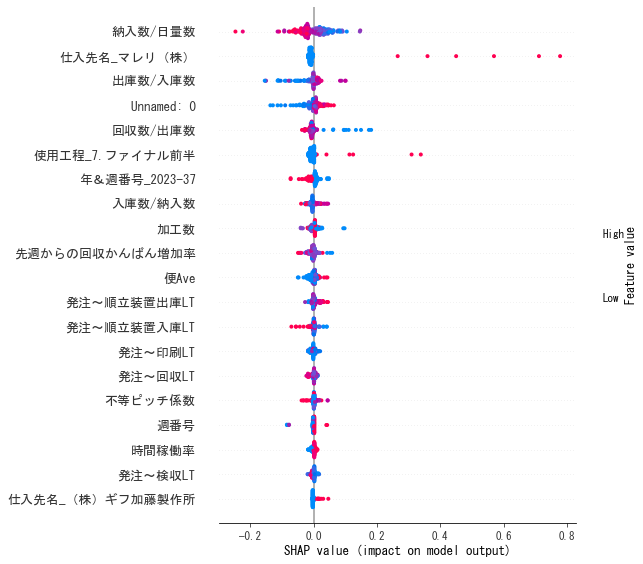

In [9]:
import shap
import matplotlib as mpl

# JavaScriptの初期化、個別いる、保存いらない
#shap.initjs()

# SHAP値の計算
explainer = shap.TreeExplainer(rf_model, feature_dependence='tree_path_dependent', model_output='margin')
shap_values = explainer.shap_values(X)

#正のSHAP値: 特定の特徴の値がモデルの予測を高める（あるいは、分類問題であれば特定のクラスに属する確率を高める）ことを意味します。たとえば、家の価格を予測するモデルで、家の大きさが大きいほど家の価格が高くなる場合、家の大きさの特徴に対するSHAP値は正になります。
#負のSHAP値: 特定の特徴の値がモデルの予測を減少させることを意味します。同じ家の価格の例で、家が主要道路から遠い場合に価格が低くなるとすれば、この特徴に対するSHAP値は負になります。

#plt.figure(figsize=(64, 40))
#plt.figure(figsize=(32, 20))

# Showing SHAP values
# フォント設定の変更（日本語対応のため）
mpl.rcParams['font.family'] = 'MS Gothic'
# サマリープロットを表示、 1つ目のグラフ
shap.summary_plot(shap_values, X, feature_names=X.columns, show=False)
# 特徴ごとのSHAP値の平均の絶対値を表示するバープロット、 2つ目のグラフ
#shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")
# 最初のデータポイントのSHAP値を表示
#shap.force_plot(explainer.expected_value, shap_values[1], X.iloc[1])
#shap_values[0]

#filename = 'kari_summa.png'
#plt.savefig(filename)

In [252]:
#大事な確認

missing_values_count = data_cleaned.isnull().sum()
print(missing_values_count)

# 各列で無限大の値をカウント
inf_counts_per_column = (data_cleaned == np.inf).sum()
print(inf_counts_per_column)

品番                      0
年                       0
週番号                     0
在庫数（箱）                  0
入庫数（箱）                  0
出庫数（箱）                  0
仕入先名                    0
日量数（箱数）                 0
発注〜印刷LT                 0
発注〜検収LT                 0
発注〜順立装置入庫LT             0
発注〜順立装置出庫LT             0
発注〜回収LT                 0
基準在庫日数                  0
基準在庫日数（基準在庫枚数込み）        0
基準在庫枚数                  0
箱種類                     0
納入回数（間隔）                0
納入回数（回数）                0
納入回数（遅れ）                0
回収かんばん数                 0
印刷検収LT                  0
検収入庫LT                  0
入庫出庫LT                  0
出庫回収LT                  0
社内LT（検収〜回収LT）           0
不等ピッチ係数                 0
社内LT/設計値LT              0
社内LT/設計値LT（基準在庫枚数込み）    0
順立装置在庫量/設計値MIN          0
順立装置在庫量/設計値MAX          0
時間稼働率                   0
加工数                     0
使用工程                    3
先週からの順立装置在庫量増加率         0
先週からの社内LT増加率            0
先週からの回収かんばん増加率          0
納入かんばん数                 0
納入数/日量数     

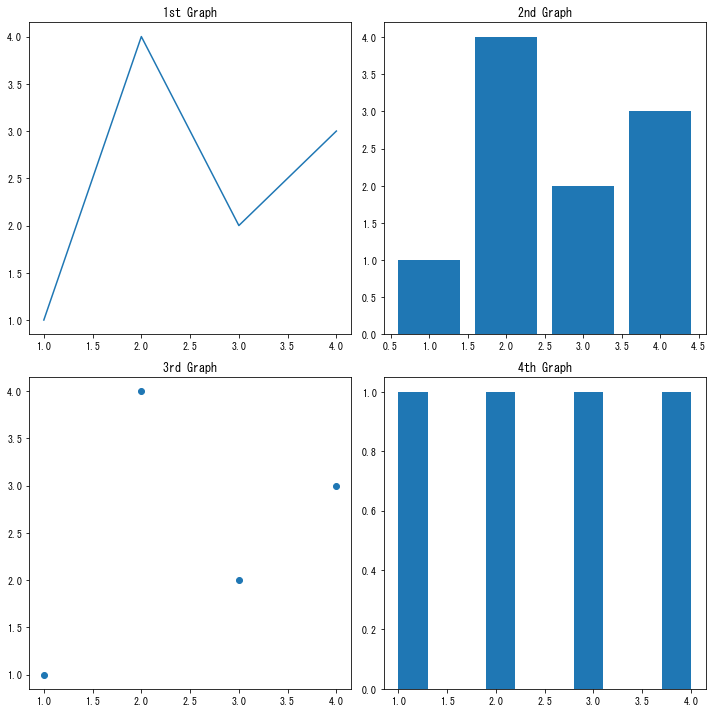

In [8]:
import matplotlib.pyplot as plt

# サブプロットの作成（2x2のグリッド）
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 1つ目のグラフ
axs[0, 0].plot([1, 2, 3, 4], [1, 4, 2, 3])
axs[0, 0].set_title('1st Graph')

# 2つ目のグラフ
axs[0, 1].bar([1, 2, 3, 4], [1, 4, 2, 3])
axs[0, 1].set_title('2nd Graph')

# 3つ目のグラフ
axs[1, 0].scatter([1, 2, 3, 4], [1, 4, 2, 3])
axs[1, 0].set_title('3rd Graph')

# 4つ目のグラフ
axs[1, 1].hist([1, 2, 3, 4])
axs[1, 1].set_title('4th Graph')

# グラフ間のスペース調整
plt.tight_layout()

# グラフの表示
plt.show()


In [274]:
print(data.columns)


Index(['Unnamed: 0', '年', '週番号', '仕入先名', '発注〜印刷LT', '発注〜検収LT', '発注〜順立装置入庫LT',
       '発注〜順立装置出庫LT', '発注〜回収LT', '基準在庫日数', '基準在庫枚数', '箱種類', '納入回数（回数）',
       '納入回数（遅れ）', '不等ピッチ係数', '社内LT/設計値LT', '順立装置在庫量/設計値MAX', '時間稼働率', '加工数',
       '使用工程', '先週からの順立装置在庫量増加率', '先週からの社内LT増加率', '先週からの回収かんばん増加率', '納入数/日量数',
       '入庫数/納入数', '出庫数/入庫数', '回収数/出庫数', '便Ave', '年＆週番号'],
      dtype='object')


In [258]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (<ipython-input-258-98201c4d83e5>, line 1)

In [193]:
print(file_path_weekly_data_with_kumitate)

中間成果物/週単位のデータ_組立統合済.csv


In [150]:
#merged_weekly_LTdata.head(5)
#weekly_zaikodata.head(5)
#weekly_data.head(5)
#merged_df_LT2.loc[:,"回収月"].head(5)
merged_df_LT2.head(15)
#t = int(merged_df_LT2.loc[2,"回収月"])

,Unnamed: 0,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
0,5806,1Z23J00046372,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 4:35,2023-09-23 07:15:00,2.08,3.00,3.15,3.89,4.00,2023/9/28 13:24
1,5807,1Z23J00046371,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 4:14,2023-09-23 06:18:00,2.08,3.00,3.15,3.88,3.96,2023/9/28 13:24
2,5808,1Z23J00046370,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 4:35,2023-09-23 07:15:00,2.08,3.00,3.15,3.89,4.00,2023/9/28 13:24
3,5809,1Z23J00046368,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:44,2023/9/22 22:32,2023-09-23 01:49:00,2.08,3.00,3.15,3.64,3.78,2023/9/28 13:24
4,5811,1Z23J00046365,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:44,2023/9/23 0:41,2023-09-23 04:30:00,2.08,3.00,3.15,3.73,3.89,2023/9/28 13:24
5,5826,1Z23J00046098,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:45,2023/9/23 3:17,2023-09-23 06:18:00,2.08,3.00,3.15,3.84,3.96,2023/9/28 13:24
6,5827,1Z23J00046097,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:45,2023/9/23 1:39,2023-09-23 06:18:00,2.08,3.00,3.15,3.77,3.96,2023/9/28 13:24
7,5828,1Z23J00046096,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:45,2023/9/23 1:39,2023-09-23 06:18:00,2.08,3.00,3.15,3.77,3.96,2023/9/28 13:24
8,5829,1Z23J00046093,G9201ECB030,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:46,2023/9/23 1:18,2023-09-23 06:18:00,2.08,3.00,3.15,3.75,3.96,2023/9/28 13:24
9,5831,1Z23J00045904,G9201ECE010,ｶﾊﾞｰｲﾝﾊﾞｰﾀｰ,8,佐藤工業（株）,藤塗装,回収済,2023-09-22,1,...,2023/9/22 7:18,2023/9/22 10:45,2023/9/23 1:59,2023-09-23 06:18:00,2.08,3.00,3.15,3.78,3.96,2023/9/28 13:24


In [268]:
conda install jupyterlab-manager

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - jupyterlab-manager

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [311]:
conda update matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda update ipython

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /anaconda/anaconda3

  added / updated specs:
    - ipython


The following NEW packages will be INSTALLED:

  importlib_resourc~ pkgs/main/noarch::importlib_resources-5.2.0-pyhd3eb1b0_1 None
  matplotlib-base    pkgs/main/osx-64::matplotlib-base-3.1.3-py37h9aa3819_0 None
  pkgutil-resolve-n~ pkgs/main/osx-64::pkgutil-resolve-name-1.3.10-py37hecd8cb5_0 None

The following packages will be UPDATED:

  jsonschema         pkgs/main/noarch::jsonschema-3.2.0-py~ --> pkgs/main/osx-64::jsonschema-4.17.3-py37hecd8cb5_0 None
  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd~ --> pkgs/main/osx-64::seaborn-0.12.2-py37hecd8cb5_0 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: 

In [75]:
merged_df.isnull().sum()
#merged_df.isnull().info()

かんばんシリアル           0
品番                 0
品名                 0
収容数                0
仕入先名               0
仕入先工場名         36386
ステータス              0
納入日                0
納入便                0
発注日時               0
印刷日時               0
検収日時               0
順立装置入庫日時           0
順立装置出庫日時           0
回収日時               0
発注〜印刷LT            0
発注〜検収LT            0
発注〜順立装置入庫LT        0
発注〜順立装置出庫LT        0
発注〜組立LT            0
発注〜回収LT            0
更新日時               0
dtype: int64

In [57]:
merged_df.dtypes

かんばんシリアル               object
伝票番号                   object
拠点所番地                  object
品番                     object
品名                     object
収容数                    object
仕入先名                   object
仕入先工場名                 object
ステータス                  object
納入日                    object
納入便                    object
発注日時                   object
印刷日時                   object
検収日時                   object
順立装置入庫日時               object
順立装置出庫日時               object
組立投入日時                 object
回収日時           datetime64[ns]
発注取消日時                 object
発注〜印刷LT                object
発注〜検収LT                object
発注〜順立装置入庫LT            object
発注〜順立装置出庫LT            object
発注〜組立LT                object
発注〜回収LT                object
更新日時                   object
長期滞留フラグ                object
dtype: object

In [70]:
merged_df.head(5)

,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,発注日時,...,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜組立LT,発注〜回収LT,更新日時
